#### Decide churn label on the basis of recency

In [119]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [120]:
df = pd.read_csv('clv_data.csv')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113102 entries, 0 to 113101
Data columns (total 54 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113102 non-null  object 
 1   customer_unique_id             113102 non-null  object 
 2   customer_zip_code_prefix       113102 non-null  int64  
 3   customer_city                  113102 non-null  object 
 4   customer_state                 113102 non-null  object 
 5   order_id                       113102 non-null  object 
 6   order_status                   113102 non-null  object 
 7   order_purchase_timestamp       113102 non-null  object 
 8   order_approved_at              113102 non-null  object 
 9   order_delivered_carrier_date   113102 non-null  object 
 10  order_delivered_customer_date  113102 non-null  object 
 11  order_estimated_delivery_date  113102 non-null  object 
 12  purchased_approved            

#### Creating a target variable
##### Assumption of Inactivity: The approach assumes that customers who haven't made a purchase recently are more likely to churn.


In [122]:
# Assuming churn threshold as 180(also give reason why ?)
churn_threshold_days = 180
df['churn'] = (df['recency'] > churn_threshold_days).astype(int)

In [123]:
df['churn'].value_counts(normalize=True)*100

churn
1    59.530335
0    40.469665
Name: proportion, dtype: float64

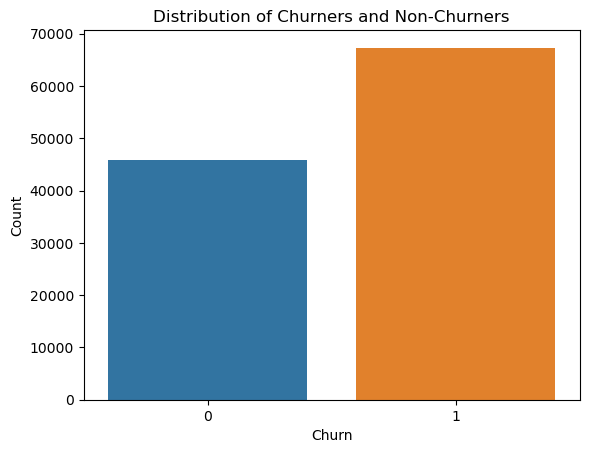

In [124]:
# Visualize the churn segmentation
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churners and Non-Churners')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


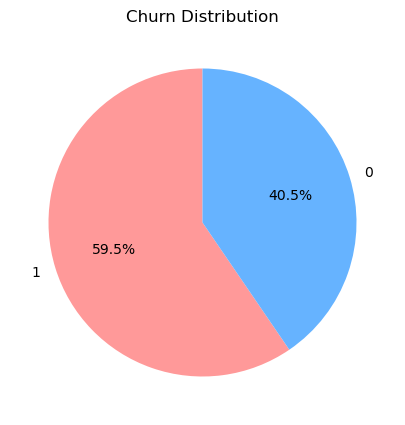

In [126]:
churn_counts = df['churn'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 5))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Churn Distribution')
plt.show()

In [8]:
df['churn'].dtype

dtype('int64')

### Droping unnescessary features

In [9]:
# Drop unnecessary features
unnecessary_features = [
    'customer_id','customer_unique_id','customer_city',
    'order_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'approved_carrier', 'carrier_delivered',

    'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
    'product_name_lenght', 'product_description_lenght', 'product_photos_qty','seller_city','seller_state',
    'geolocation_zip_code_prefix',
    'payment_sequential','purchased_approved','delivered_estimated','purchased_delivered',
    'seller_zip_code_prefix', 'payment_value',
    'product_category_name_english','product_category_name','customer_zip_code_prefix',
    'review_id', 'review_comment_title', 'review_comment_message',
    'review_creation_date', 'review_answer_timestamp','late_deliveries'
]

# Drop unnecessary features from the DataFrame
final = df.drop(unnecessary_features, axis=1)


In [10]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113102 entries, 0 to 113101
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   customer_state        113102 non-null  object 
 1   price                 113102 non-null  float64
 2   freight_value         113102 non-null  float64
 3   product_weight_g      113102 non-null  float64
 4   product_length_cm     113102 non-null  float64
 5   product_height_cm     113102 non-null  float64
 6   product_width_cm      113102 non-null  float64
 7   geolocation_lat       113102 non-null  float64
 8   geolocation_lng       113102 non-null  float64
 9   payment_type          113102 non-null  object 
 10  payment_installments  113102 non-null  int64  
 11  review_score          11553 non-null   float64
 12  recency               113102 non-null  int64  
 13  frequency             113102 non-null  int64  
 14  monetary_value        113102 non-null  float64
 15  

In [11]:
final.head()

,customer_state,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,payment_type,payment_installments,review_score,recency,frequency,monetary_value,customer_tenure,num_orders,churn
0,SP,124.99,21.88,8683.0,54.0,64.0,31.0,-20.468849,-47.382173,credit_card,2,NaN,469,1,146.87,0,1,1
1,PA,112.99,24.90,8683.0,54.0,64.0,31.0,-2.430314,-54.693217,credit_card,1,NaN,293,2,551.58,0,1,1
2,PA,112.99,24.90,8683.0,54.0,64.0,31.0,-2.430314,-54.693217,credit_card,1,NaN,293,2,551.58,0,1,1
3,RS,124.99,15.62,8683.0,54.0,64.0,31.0,-29.826454,-51.245676,credit_card,7,NaN,478,1,140.61,0,1,1
4,RJ,106.99,30.59,8683.0,54.0,64.0,31.0,-22.604835,-43.026500,credit_card,10,NaN,206,1,137.58,0,1,1


In [12]:
final['review_score'].unique()

array([nan,  1.,  4.,  3.,  5.,  2.])

In [13]:
final['review_score'].value_counts()

review_score
5.0    6165
1.0    2152
4.0    1733
3.0     921
2.0     582
Name: count, dtype: int64

In [14]:
final.isna().sum() / len(final) * 100

customer_state           0.000000
price                    0.000000
freight_value            0.000000
product_weight_g         0.000000
product_length_cm        0.000000
product_height_cm        0.000000
product_width_cm         0.000000
geolocation_lat          0.000000
geolocation_lng          0.000000
payment_type             0.000000
payment_installments     0.000000
review_score            89.785327
recency                  0.000000
frequency                0.000000
monetary_value           0.000000
customer_tenure          0.000000
num_orders               0.000000
churn                    0.000000
dtype: float64

#### Observation:
Since most(~90%) of the review_score are null, dropping them

### Treating null values in review_score

In [15]:
final.drop(columns = ['review_score'],axis = 1, inplace =True)


In [16]:
final.head()

,customer_state,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,payment_type,payment_installments,recency,frequency,monetary_value,customer_tenure,num_orders,churn
0,SP,124.99,21.88,8683.0,54.0,64.0,31.0,-20.468849,-47.382173,credit_card,2,469,1,146.87,0,1,1
1,PA,112.99,24.90,8683.0,54.0,64.0,31.0,-2.430314,-54.693217,credit_card,1,293,2,551.58,0,1,1
2,PA,112.99,24.90,8683.0,54.0,64.0,31.0,-2.430314,-54.693217,credit_card,1,293,2,551.58,0,1,1
3,RS,124.99,15.62,8683.0,54.0,64.0,31.0,-29.826454,-51.245676,credit_card,7,478,1,140.61,0,1,1
4,RJ,106.99,30.59,8683.0,54.0,64.0,31.0,-22.604835,-43.026500,credit_card,10,206,1,137.58,0,1,1


In [17]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113102 entries, 0 to 113101
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   customer_state        113102 non-null  object 
 1   price                 113102 non-null  float64
 2   freight_value         113102 non-null  float64
 3   product_weight_g      113102 non-null  float64
 4   product_length_cm     113102 non-null  float64
 5   product_height_cm     113102 non-null  float64
 6   product_width_cm      113102 non-null  float64
 7   geolocation_lat       113102 non-null  float64
 8   geolocation_lng       113102 non-null  float64
 9   payment_type          113102 non-null  object 
 10  payment_installments  113102 non-null  int64  
 11  recency               113102 non-null  int64  
 12  frequency             113102 non-null  int64  
 13  monetary_value        113102 non-null  float64
 14  customer_tenure       113102 non-null  int64  
 15  

In [18]:
final.shape

(113102, 17)

In [19]:
final.duplicated().sum()

12532

In [20]:
final = final.drop_duplicates()
final.shape

(100570, 17)

#### Outliers treatment:

In [21]:
print(final.describe())

               price  freight_value  product_weight_g  product_length_cm  \
count  100570.000000  100570.000000     100570.000000      100570.000000   
mean      124.036842      20.128775       2096.604117          30.159024   
std       187.880830      15.816902       3745.238373          16.104967   
min         0.850000       0.000000          0.000000           7.000000   
25%        40.800000      13.160000        300.000000          18.000000   
50%        78.000000      16.370000        700.000000          25.000000   
75%       139.000000      21.260000       1800.000000          38.000000   
max      6735.000000     409.680000      40425.000000         105.000000   

       product_height_cm  product_width_cm  geolocation_lat  geolocation_lng  \
count      100570.000000     100570.000000    100570.000000    100570.000000   
mean           16.420006         23.096231       -21.139062       -46.127006   
std            13.298805         11.746252         5.671584         4.09502

In [22]:
# Identify outliers using z-score
from scipy import stats
print(f'Number of rows before filtering outliers : {len(final)}')

filtered_entries = np.array ([True] * len(final))

for col in ['recency', 'frequency', 'monetary_value', 'customer_tenure', 'freight_value','price','num_orders',\
            'product_weight_g','product_length_cm','product_height_cm','product_width_cm','payment_installments',\
           'geolocation_lat','geolocation_lng']:
  zscore = abs(stats.zscore(final[col]))
  filtered_entries = (zscore < 3)

final = final[filtered_entries]
print(f'Number of rows after filtering outlier : {len(final)}')


Number of rows before filtering outliers : 100570
Number of rows after filtering outlier : 99954


In [23]:
print(final.describe())

              price  freight_value  product_weight_g  product_length_cm  \
count  99954.000000   99954.000000      99954.000000       99954.000000   
mean     123.784472      20.018473       2096.311683          30.165296   
std      187.470776      15.698134       3743.139095          16.110173   
min        0.850000       0.000000          0.000000           7.000000   
25%       40.800000      13.120000        300.000000          18.000000   
50%       78.000000      16.320000        700.000000          25.000000   
75%      139.000000      21.150000       1800.000000          38.000000   
max     6735.000000     409.680000      40425.000000         105.000000   

       product_height_cm  product_width_cm  geolocation_lat  geolocation_lng  \
count       99954.000000      99954.000000     99954.000000     99954.000000   
mean           16.421344         23.098265       -21.230236       -46.038655   
std            13.301859         11.744954         5.518765         3.867933   
min 

#### Observation:
since most of the customers are one timers, and std of num_orders is almost 0, dropping both the features as they
won't add any values in model trianing

In [24]:
final.drop(columns = ['num_orders', 'frequency'], axis = 1, inplace = True)

### Creating a new df for model 

In [25]:
model_df = final.copy()
model_df.head()

,customer_state,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,payment_type,payment_installments,recency,monetary_value,customer_tenure,churn
0,SP,124.99,21.88,8683.0,54.0,64.0,31.0,-20.468849,-47.382173,credit_card,2,469,146.87,0,1
1,PA,112.99,24.90,8683.0,54.0,64.0,31.0,-2.430314,-54.693217,credit_card,1,293,551.58,0,1
3,RS,124.99,15.62,8683.0,54.0,64.0,31.0,-29.826454,-51.245676,credit_card,7,478,140.61,0,1
4,RJ,106.99,30.59,8683.0,54.0,64.0,31.0,-22.604835,-43.026500,credit_card,10,206,137.58,0,1
5,SC,126.99,15.06,8683.0,54.0,64.0,31.0,-27.563095,-48.983780,credit_card,5,523,142.05,0,1


### Target Imbalance:

In [26]:
class_distribution = model_df['churn'].value_counts()
print(class_distribution)

churn
1    59373
0    40581
Name: count, dtype: int64


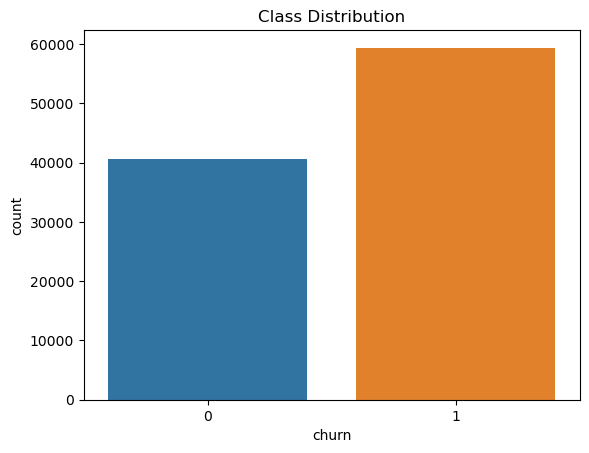

In [27]:
sns.countplot(x='churn', data=model_df)
plt.title('Class Distribution')
plt.show()

#### Target is balanced. 

In [28]:
from sklearn.preprocessing import PowerTransformer

# Select the columns to transform
columns_to_transform = [ 'geolocation_lat', 'geolocation_lng']

# Fit the PowerTransformer on the selected columns
pt = PowerTransformer(method='yeo-johnson')
model_df[columns_to_transform] = pt.fit_transform(model_df[columns_to_transform])


In [29]:
# Select the columns to transform
columns_to_transform_box_cox = [col for col in model_df.select_dtypes(include=np.number).\
                                columns if col not in [ 'geolocation_lat', 'geolocation_lng','churn']]

# Fit the PowerTransformer on the selected columns using Box-Cox method
pt_box_cox = PowerTransformer(method='box-cox')
model_df[columns_to_transform_box_cox] = pt_box_cox.fit_transform(0.001 + model_df[columns_to_transform_box_cox])

#### Observation:

1. The variables which have negative values are transformed using yeo-johnson method, as log of 0 or negative values would return infinite value.
2. The variables which has only positive values in it are transformed using box-cox method.

#### Data Transformation

In [30]:
def state_encoding(state):
    if state in ['RS', 'SC', 'PR']:
        return 'southern'
    elif state in ['SP', 'RJ', 'MG', 'ES']:
        return 'southeastern'
    elif state in ['MT', 'MS', 'GO', 'DF']:
        return 'centralwestern'
    elif state in ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']:
        return 'northeastern'
    else: 
        return 'northern'

In [31]:
model_df['customer_state'] = model_df['customer_state'].apply(state_encoding)

#### Observation:
Since the states are spread across the brazil, we are grouping the states based on the regions they are in, 
namely southern, southeastern, centralwestern, northeastern and northern. 

In [32]:
model_df.head()

,customer_state,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,payment_type,payment_installments,recency,monetary_value,customer_tenure,churn
0,southeastern,0.555930,0.379366,1.700337,1.428062,2.319,0.948067,0.371516,-0.303443,credit_card,0.085629,1.351563,0.238023,-0.217781,1
1,northern,0.449420,0.614933,1.700337,1.428062,2.319,0.948067,2.301882,-2.510184,credit_card,-0.909241,0.477702,1.427903,-0.217781,1
3,southern,0.555930,-0.197227,1.700337,1.428062,2.319,0.948067,-2.301234,-1.416964,credit_card,1.452116,1.391858,0.191865,-0.217781,1
4,southeastern,0.391444,1.007352,1.700337,1.428062,2.319,0.948067,-0.124025,0.814408,credit_card,1.759611,-0.043300,0.168593,-0.217781,1
5,southern,0.572595,-0.256586,1.700337,1.428062,2.319,0.948067,-1.532606,-0.750928,credit_card,1.131792,1.588424,0.202706,-0.217781,1


#### Observation:
Since the states are spread across the brazil, we are grouping the states based on the regions they are in, 
namely southern, southeastern, centralwestern, northeastern and northern. 

### Label encoding

#### feature transformation

In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding for columns
for col in ['customer_state', 'payment_type']:
    model_df[col] = label_encoder.fit_transform(model_df[col])

In [34]:
# Pair Plots (Numeric)
#sns.pairplot(model_df, diag_kind='kde', hue='churn')

In [35]:
model_df.head()

,customer_state,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,payment_type,payment_installments,recency,monetary_value,customer_tenure,churn
0,3,0.555930,0.379366,1.700337,1.428062,2.319,0.948067,0.371516,-0.303443,1,0.085629,1.351563,0.238023,-0.217781,1
1,2,0.449420,0.614933,1.700337,1.428062,2.319,0.948067,2.301882,-2.510184,1,-0.909241,0.477702,1.427903,-0.217781,1
3,4,0.555930,-0.197227,1.700337,1.428062,2.319,0.948067,-2.301234,-1.416964,1,1.452116,1.391858,0.191865,-0.217781,1
4,3,0.391444,1.007352,1.700337,1.428062,2.319,0.948067,-0.124025,0.814408,1,1.759611,-0.043300,0.168593,-0.217781,1
5,4,0.572595,-0.256586,1.700337,1.428062,2.319,0.948067,-1.532606,-0.750928,1,1.131792,1.588424,0.202706,-0.217781,1


#### Now, to see which number associated with which label

#### To determine the importance of features for predicting churn
This fits a Random Forest classifier on the data, extracts feature importances, and then displays them in a DataFrame. Features with higher importance values are considered more influential in predicting churn.

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = model_df.drop('churn', axis=1)
y = model_df['churn']


In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [39]:
# Get feature importances
feature_importances = rf_model.feature_importances_

In [40]:
# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

In [41]:
# Sort features by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

In [42]:
# Display the feature importances
print(importances_df)

                 Feature  Importance
11               recency    0.919810
2          freight_value    0.043793
3       product_weight_g    0.005465
7        geolocation_lat    0.004920
1                  price    0.004749
12        monetary_value    0.004361
8        geolocation_lng    0.003743
6       product_width_cm    0.003542
5      product_height_cm    0.003129
4      product_length_cm    0.003069
0         customer_state    0.001989
10  payment_installments    0.000964
9           payment_type    0.000354
13       customer_tenure    0.000113


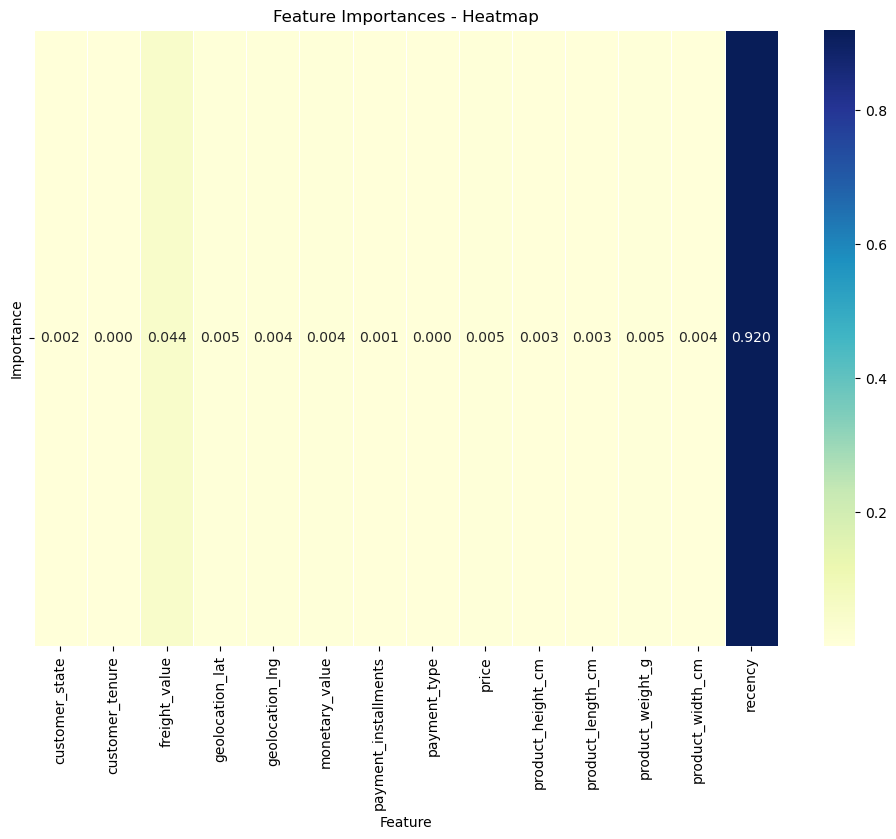

In [43]:
import seaborn as sns

# Increase figure size
plt.figure(figsize=(12, 8))

# Plotting a seaborn heatmap with numbers
sns.heatmap(importances_df.pivot_table(index='Feature', values='Importance').T,
            cmap="YlGnBu", annot=True, fmt=".3f", linewidths=.5)

plt.title('Feature Importances - Heatmap')
plt.show()



#### Importance of features: correlation:

In [44]:
correlation_matrix = model_df.corr()
correlation_with_churn = correlation_matrix['churn'].abs().sort_values(ascending=False)


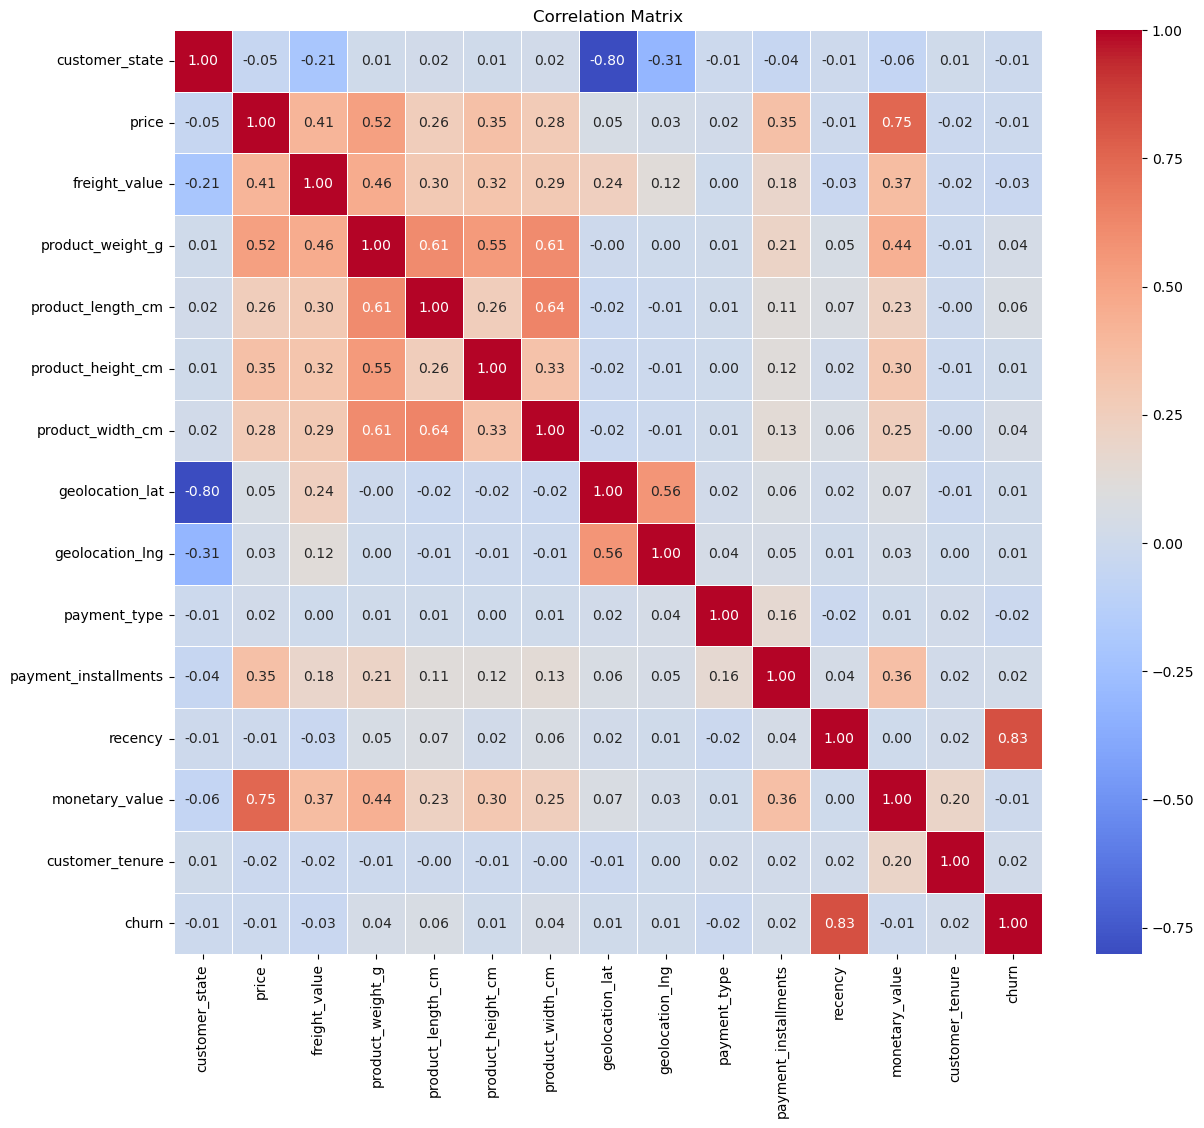

In [45]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



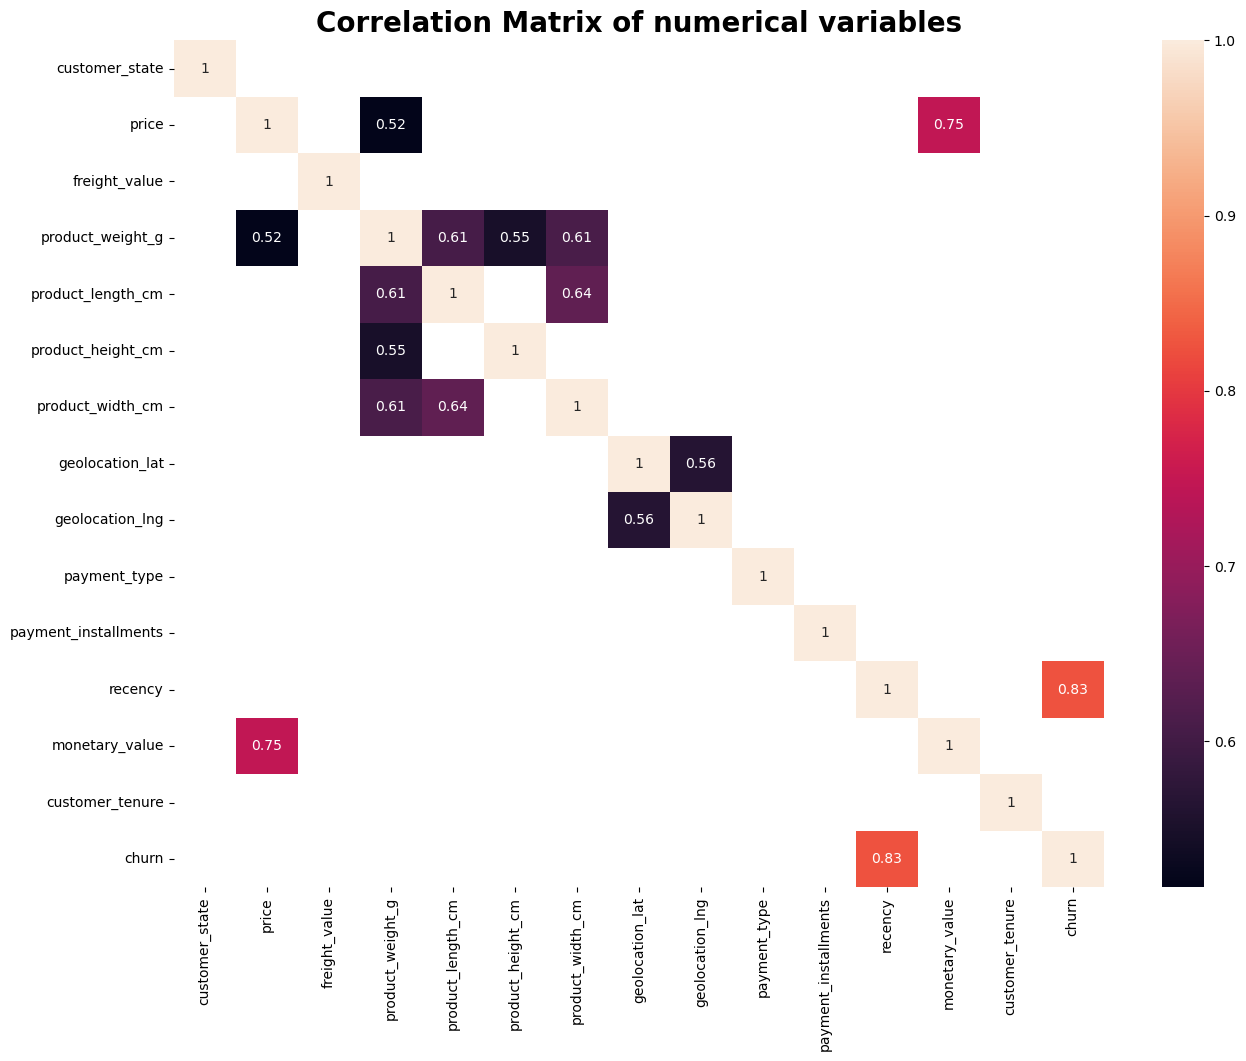

In [46]:
plt.figure(figsize=(15,11))
sns.heatmap(model_df.corr()[model_df.corr() > 0.5], annot = True)
plt.title('Correlation Matrix of numerical variables',fontsize=20,fontweight='bold')
plt.show()

#### Insights:
from the above analyese, we will only proceed with all features.

In [47]:
#model_df = final[['recency','frequency','monetary_value','price','freight_value','review_score','churn']]
model_df.head()

,customer_state,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,payment_type,payment_installments,recency,monetary_value,customer_tenure,churn
0,3,0.555930,0.379366,1.700337,1.428062,2.319,0.948067,0.371516,-0.303443,1,0.085629,1.351563,0.238023,-0.217781,1
1,2,0.449420,0.614933,1.700337,1.428062,2.319,0.948067,2.301882,-2.510184,1,-0.909241,0.477702,1.427903,-0.217781,1
3,4,0.555930,-0.197227,1.700337,1.428062,2.319,0.948067,-2.301234,-1.416964,1,1.452116,1.391858,0.191865,-0.217781,1
4,3,0.391444,1.007352,1.700337,1.428062,2.319,0.948067,-0.124025,0.814408,1,1.759611,-0.043300,0.168593,-0.217781,1
5,4,0.572595,-0.256586,1.700337,1.428062,2.319,0.948067,-1.532606,-0.750928,1,1.131792,1.588424,0.202706,-0.217781,1


#### Feature Transformation

In [48]:
from scipy.stats import skew, kurtosis

In [49]:
feature_trans = model_df.copy()
feature_normal = []
feature_not_normal = []

for i in feature_trans:
  skw = skew(model_df[i])
  kts = kurtosis(model_df[i])
  if skw < 2 and skw > -2:
    if kts < 2 and kts > -2:
      feature_normal.append(i)
    else:
      feature_not_normal.append(i)
  else:
    feature_not_normal.append(i)

print('Normal_distribution:', feature_normal)
print('Not_normal_distribution:', feature_not_normal)

Normal_distribution: ['customer_state', 'price', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'geolocation_lat', 'geolocation_lng', 'recency', 'monetary_value', 'churn']
Not_normal_distribution: ['freight_value', 'product_weight_g', 'payment_type', 'payment_installments', 'customer_tenure']


#### Model

In [50]:
#model_df['churn'] = final['churn'].astype(int)
#model_df['churn'] = model_df.churn.astype('int')

In [51]:
model_df['churn'].unique()

array([1, 0])

In [52]:
model_df.drop(columns = ['recency'], axis = 1, inplace = True)

In [53]:
model_df.head()

,customer_state,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,payment_type,payment_installments,monetary_value,customer_tenure,churn
0,3,0.555930,0.379366,1.700337,1.428062,2.319,0.948067,0.371516,-0.303443,1,0.085629,0.238023,-0.217781,1
1,2,0.449420,0.614933,1.700337,1.428062,2.319,0.948067,2.301882,-2.510184,1,-0.909241,1.427903,-0.217781,1
3,4,0.555930,-0.197227,1.700337,1.428062,2.319,0.948067,-2.301234,-1.416964,1,1.452116,0.191865,-0.217781,1
4,3,0.391444,1.007352,1.700337,1.428062,2.319,0.948067,-0.124025,0.814408,1,1.759611,0.168593,-0.217781,1
5,4,0.572595,-0.256586,1.700337,1.428062,2.319,0.948067,-1.532606,-0.750928,1,1.131792,0.202706,-0.217781,1


#### Observation:
The Recency feature is dropped for the model building, as it is used to create the target variable. 
Predictions would be 100% accurate if the Recency feature is not dropped, which would be a good model

In [54]:
from sklearn.model_selection import train_test_split
X = model_df.drop(['churn'], axis=1)
y = model_df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (79963, 13)
y_train (79963,)
X_test (19991, 13)
y_test (19991,)


#### Statistically proving train & test are good representations of overall data.
#### A t-test independence on each column to show both have equal or similar representation.

#### Null Hypothesis, H0: Both sets have same mean, thus they have equal representation.
#### Alternate Hypothesis, Ha: Both sets have unequal means, thus unequal representation.

In [56]:
tstats,pvals = stats.ttest_ind(X_train, X_test)
ref_df = pd.DataFrame(pvals,index=X_train.columns,columns=['pvals'])
(ref_df < 0.05).any()

pvals    False
dtype: bool

#### Observation:
As all the columns have p-values greater than significance level of 0.05, we do not reject the null hypothesis 
and we can conclude that all independent features are properly represented both in train and test sets.

### Logit Regression

In [57]:
import statsmodels.api as smo

logreg = smo.Logit(y_train, X_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.671623
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                79963
Model:                          Logit   Df Residuals:                    79950
Method:                           MLE   Df Model:                           12
Date:                Thu, 15 Feb 2024   Pseudo R-squ.:                0.005666
Time:                        09:40:33   Log-Likelihood:                -53705.
converged:                       True   LL-Null:                       -54011.
Covariance Type:            nonrobust   LLR p-value:                2.800e-123
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
customer_state           0.1426      0.004     31.816      0.000       0.134       0.151

In [58]:
print('Akaike information criterion (AIC):', logreg.aic)

Akaike information criterion (AIC): 107436.02348919591


#### The AIC gives a trade-off between the model accuracy and model complexity, i.e., it prevents from overfitting.

In [59]:
logreg.params

customer_state          0.142590
price                  -0.063560
freight_value          -0.135305
product_weight_g        0.073387
product_length_cm       0.106414
product_height_cm       0.014188
product_width_cm        0.025703
geolocation_lat         0.193045
geolocation_lng        -0.029298
payment_type           -0.031010
payment_installments    0.070269
monetary_value         -0.014194
customer_tenure         0.027968
dtype: float64

In [60]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 
df_odds

,Odds
customer_state,1.153257
price,0.938418
freight_value,0.873449
product_weight_g,1.076147
product_length_cm,1.112283
product_height_cm,1.014289
product_width_cm,1.026037
geolocation_lat,1.212938
geolocation_lng,0.971127
payment_type,0.969466


In [61]:
#train set
y_pred_prob_train = logreg.predict(X_train)
y_pred_train = [ 0 if x < 0.5 else 1 for x in y_pred_prob_train]

In [62]:
#test set
y_pred_prob = logreg.predict(X_test)
y_pred_prob.head()

12424    0.603768
45840    0.615312
92954    0.556696
47149    0.628778
77458    0.658459
dtype: float64

In [63]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
y_pred[0:5]


[1, 1, 1, 1, 1]

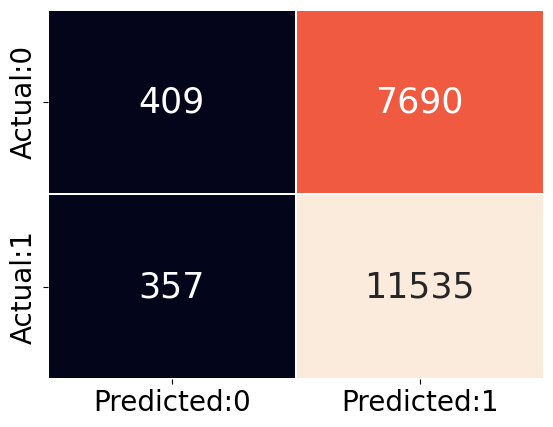

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [65]:
from sklearn.metrics import classification_report
acc_table = classification_report(y_test, y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       0.53      0.05      0.09      8099
           1       0.60      0.97      0.74     11892

    accuracy                           0.60     19991
   macro avg       0.57      0.51      0.42     19991
weighted avg       0.57      0.60      0.48     19991



In [66]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_pred)
print('kappa value:',kappa)



kappa value: 0.023936102389097713


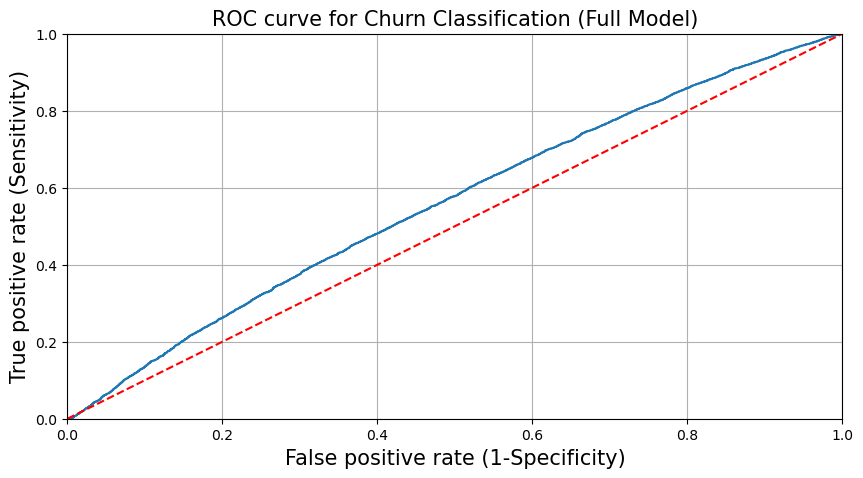

In [67]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize = (10, 5))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Churn Classification (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.grid(True)

### Decision Tree model¶

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (79963, 13)
y_train (79963,)
X_test (19991, 13)
y_test (19991,)


In [69]:
tstats,pvals = stats.ttest_ind(X_train, X_test)
ref_df = pd.DataFrame(pvals,index=X_train.columns,columns=['pvals'])
(ref_df < 0.05).any()

pvals    False
dtype: bool

In [70]:
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier()
decisionTree = decisionTree.fit(X_train, y_train)

In [71]:
ypred_proba_dt = decisionTree.predict(X_test)

In [72]:
ypred_dt = [0 if i < 0.5 else 1 for i in ypred_proba_dt]
ypred_dt[:10]

[0, 0, 0, 1, 1, 1, 1, 1, 0, 1]

In [73]:
ypred_proba_dt_train = decisionTree.predict(X_train)
ypred_dt_train = [0 if i < 0.5 else 1 for i in ypred_proba_dt_train]

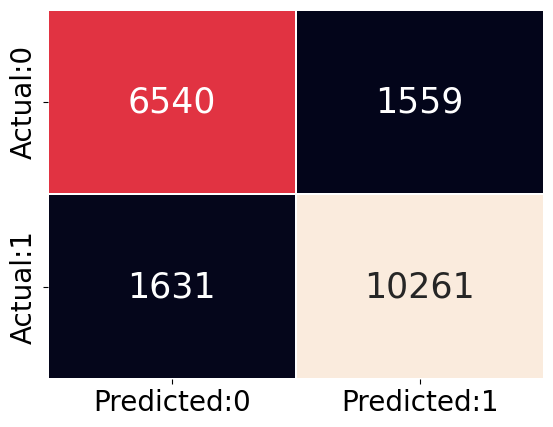

In [74]:
cm = confusion_matrix(y_test, ypred_dt)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [75]:
print(classification_report(y_test, ypred_dt))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      8099
           1       0.87      0.86      0.87     11892

    accuracy                           0.84     19991
   macro avg       0.83      0.84      0.83     19991
weighted avg       0.84      0.84      0.84     19991



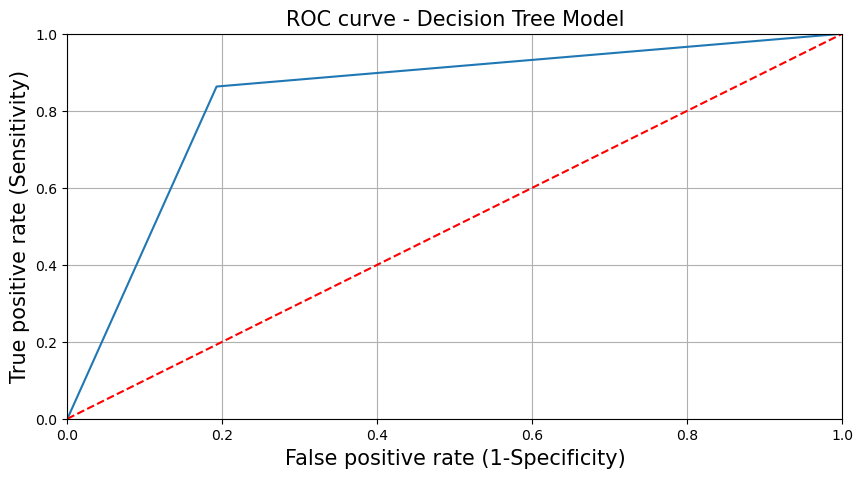

In [76]:
plt.figure(figsize = (10, 5))
fpr, tpr, thresholds = roc_curve(y_test, ypred_proba_dt)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve - Decision Tree Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.grid(True)

###  XG Boost Model¶

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (79963, 13)
y_train (79963,)
X_test (19991, 13)
y_test (19991,)


In [78]:
tstats,pvals = stats.ttest_ind(X_train, X_test)
ref_df = pd.DataFrame(pvals,index=X_train.columns,columns=['pvals'])
(ref_df < 0.05).any()

pvals    False
dtype: bool

In [79]:
from xgboost import XGBClassifier
xgBoost = XGBClassifier()
xbBoost = xgBoost.fit(X_train, y_train)

In [80]:
ypred_proba_xg = xgBoost.predict(X_test)

In [81]:
ypred_xg = [0 if i < 0.5 else 1 for i in ypred_proba_xg]
ypred_xg[:10]

[1, 1, 0, 1, 1, 1, 1, 1, 0, 1]

In [82]:
ypred_proba_xg_train = xgBoost.predict(X_train)
ypred_xg_train = [0 if i < 0.5 else 1 for i in ypred_proba_xg_train]

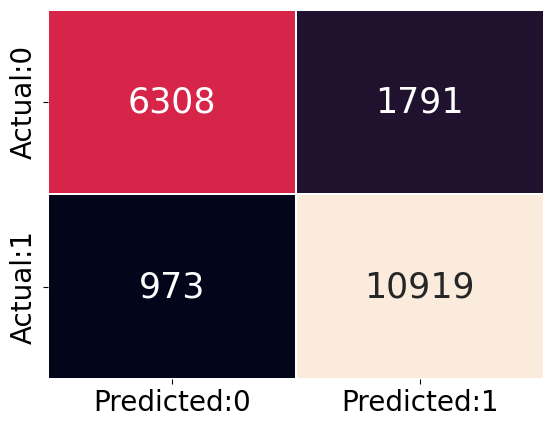

In [83]:
cm = confusion_matrix(y_test, ypred_xg)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()


In [84]:
print(classification_report(y_test, ypred_xg))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      8099
           1       0.86      0.92      0.89     11892

    accuracy                           0.86     19991
   macro avg       0.86      0.85      0.85     19991
weighted avg       0.86      0.86      0.86     19991



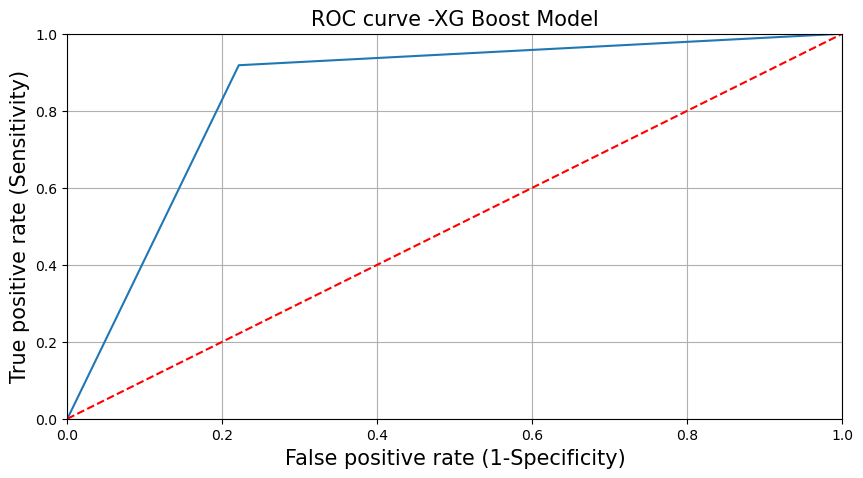

In [85]:
plt.figure(figsize = (10, 5))
fpr, tpr, thresholds = roc_curve(y_test, ypred_proba_xg)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve -XG Boost Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.grid(True)

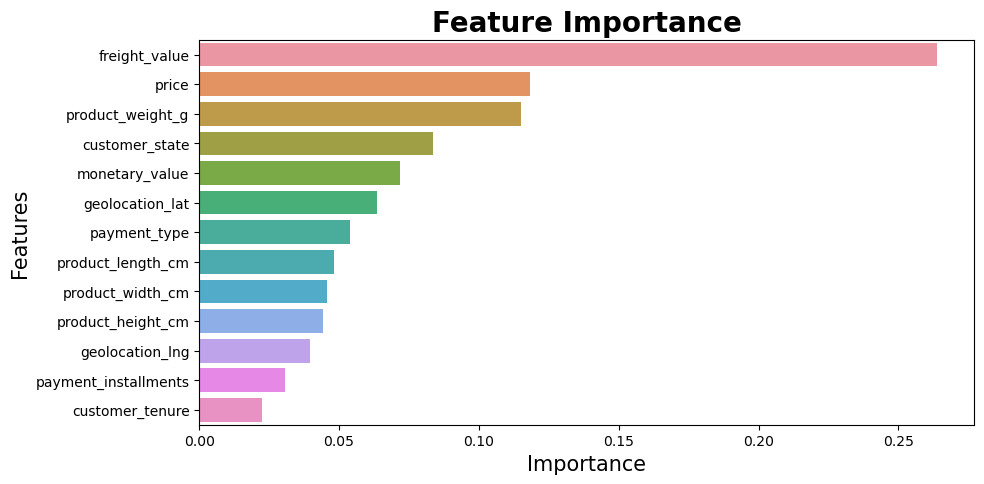

In [86]:
plt.figure(figsize=(10, 5))
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xbBoost.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance',color='black',fontsize=20,fontweight='bold')
plt.xlabel('Importance',color='black',fontsize=15)
plt.ylabel('Features',color='black',fontsize=15)
plt.show()



### Random Forest Classifier¶

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 500)
print('xtrain: ', X_train.shape)
print('ytrain: ', y_train.shape)
print('xtest: ', X_test.shape)
print('ytest: ', y_test.shape)

xtrain:  (79963, 13)
ytrain:  (79963,)
xtest:  (19991, 13)
ytest:  (19991,)


In [88]:
tstats,pvals = stats.ttest_ind(X_train, X_test)
ref_df = pd.DataFrame(pvals,index=X_train.columns,columns=['pvals'])
(ref_df < 0.05).any()

pvals    False
dtype: bool

In [89]:
rand = RandomForestClassifier()
rand_model = rand.fit(X_train,y_train)

In [90]:
ypred_proba_random = rand_model.predict(X_test)

In [91]:
ypred_random = [0 if i < 0.5 else 1 for i in ypred_proba_random]
ypred_random[:10]

[1, 1, 1, 0, 1, 0, 1, 1, 0, 0]

In [92]:
ypred_proba_random_train = rand_model.predict(X_train)
ypred_random_train = [0 if i < 0.5 else 1 for i in ypred_proba_random_train]

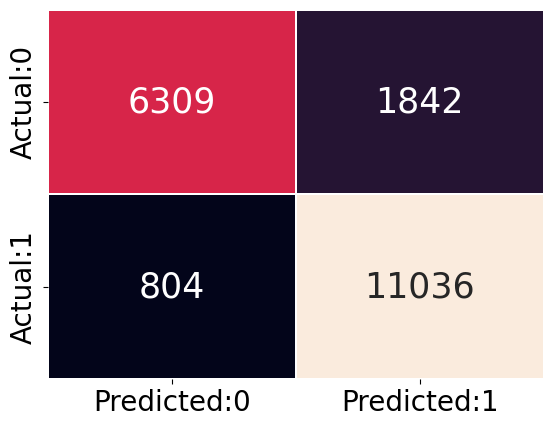

In [93]:
cm = confusion_matrix(y_test, ypred_random)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [94]:
print(classification_report(y_test, ypred_random))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      8151
           1       0.86      0.93      0.89     11840

    accuracy                           0.87     19991
   macro avg       0.87      0.85      0.86     19991
weighted avg       0.87      0.87      0.87     19991



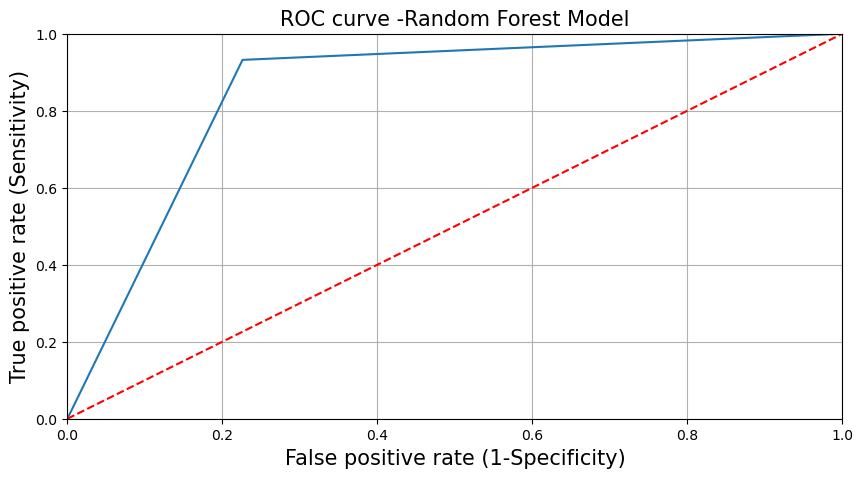

In [95]:
plt.figure(figsize = (10, 5))
fpr, tpr, thresholds = roc_curve(y_test, ypred_proba_random)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve -Random Forest Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.grid(True)

### Logistic Regression

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 500)
print('xtrain: ', X_train.shape)
print('ytrain: ', y_train.shape)
print('xtest: ', X_test.shape)
print('ytest: ', y_test.shape)

xtrain:  (79963, 13)
ytrain:  (79963,)
xtest:  (19991, 13)
ytest:  (19991,)


In [97]:
tstats,pvals = stats.ttest_ind(X_train, X_test)
ref_df = pd.DataFrame(pvals,index=X_train.columns,columns=['pvals'])
(ref_df < 0.05).any()

pvals    False
dtype: bool

In [98]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_model = lr.fit(X_train,y_train)

In [99]:
ypred_proba_log = lr_model.predict(X_test)
ypred_log = [0 if i < 0.5 else 1 for i in ypred_proba_log]
ypred_log[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [100]:
ypred_proba_log_train = lr_model.predict(X_train)
ypred_log_train = [0 if i < 0.5 else 1 for i in ypred_proba_log_train]

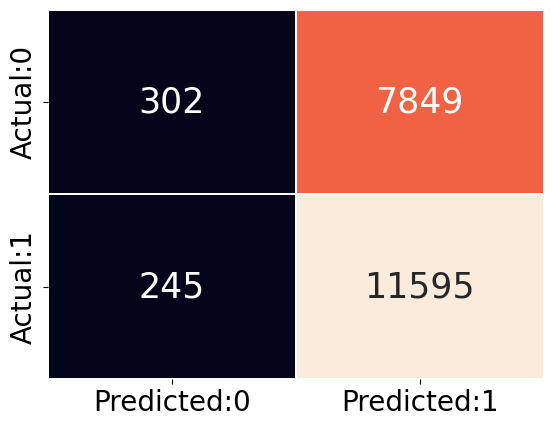

In [101]:
cm = confusion_matrix(y_test, ypred_log)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [102]:
print(classification_report(y_test, ypred_log))



              precision    recall  f1-score   support

           0       0.55      0.04      0.07      8151
           1       0.60      0.98      0.74     11840

    accuracy                           0.60     19991
   macro avg       0.57      0.51      0.41     19991
weighted avg       0.58      0.60      0.47     19991



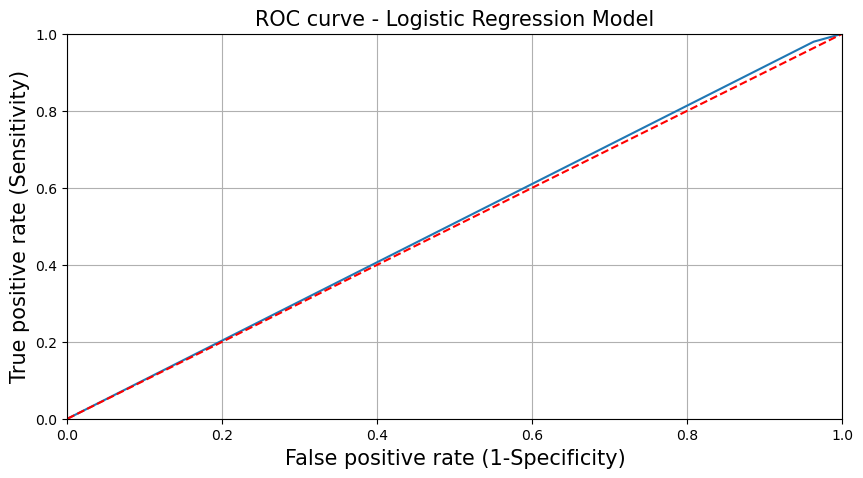

In [103]:
plt.figure(figsize = (10, 5))
fpr, tpr, thresholds = roc_curve(y_test, ypred_proba_log)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve - Logistic Regression Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.grid(True)


### Observation:
1. Logistic Regression:

    Accuracy: 60%
    Precision (churn=1): 60%
    Recall (churn=1): 98%
    F1-score (churn=1): 74%

Insights:

    Low precision for churn=1 suggests that there are false positives.
    High recall for churn=1 indicates the model is good at capturing actual churn cases.

2. Decision Tree model:

    Accuracy: 84%
    Precision (churn=1): 87%
    Recall (churn=1): 86%
    F1-score (churn=1): 87%

Insights:

    Balanced precision and recall for churn=1.
    Good overall performance.

3. XGBoost:

    Accuracy: 86%
    Precision (churn=1): 86%
    Recall (churn=1): 92%
    F1-score (churn=1): 89%

Insights:

    Good precision and recall for churn=1.
    Overall high performance.

4. Random Forest:

    Accuracy: 87%
    Precision (churn=1): 86%
    Recall (churn=1): 93%
    F1-score (churn=1): 89%

Insights:

    Similar performance to XGBoost, with high precision and recall for churn=1.
    
    

From above observation, its clear that XG boost and Random forest are the best performing models. Now we will do Feature Importance Analysis:

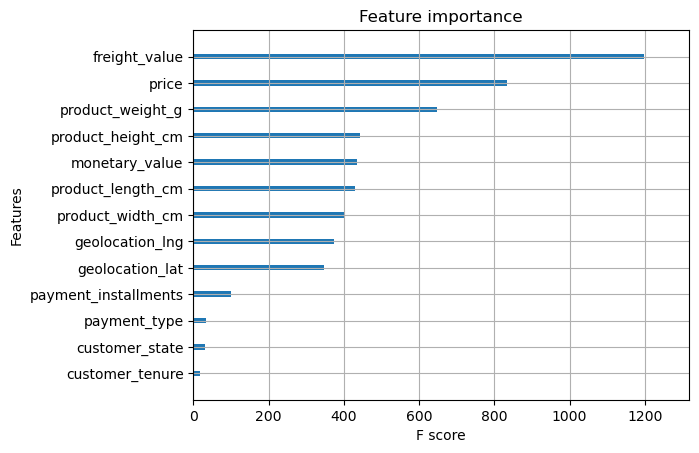

Top 10 important features: ['freight_value', 'price', 'product_weight_g', 'product_height_cm', 'monetary_value', 'product_length_cm', 'product_width_cm', 'geolocation_lng', 'geolocation_lat', 'payment_installments']


In [111]:
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

# Assuming xgBoost is your trained XGBoost model
xgBoost = XGBClassifier()
xgBoost.fit(X_train, y_train)

# Plot feature importance
plot_importance(xgBoost, importance_type='weight', show_values=False)
plt.show()

# Extract the top N important features
top_n = 10  # Specify the number of top features you want to consider
important_features_xgboost = xgBoost.get_booster().get_score(importance_type='weight')
important_features_xgboost = sorted(important_features_xgboost.items(), key=lambda x: x[1], reverse=True)[:top_n]
important_features_xgboost = [feature[0] for feature in important_features_xgboost]

print("Top", top_n, "important features:", important_features_xgboost)


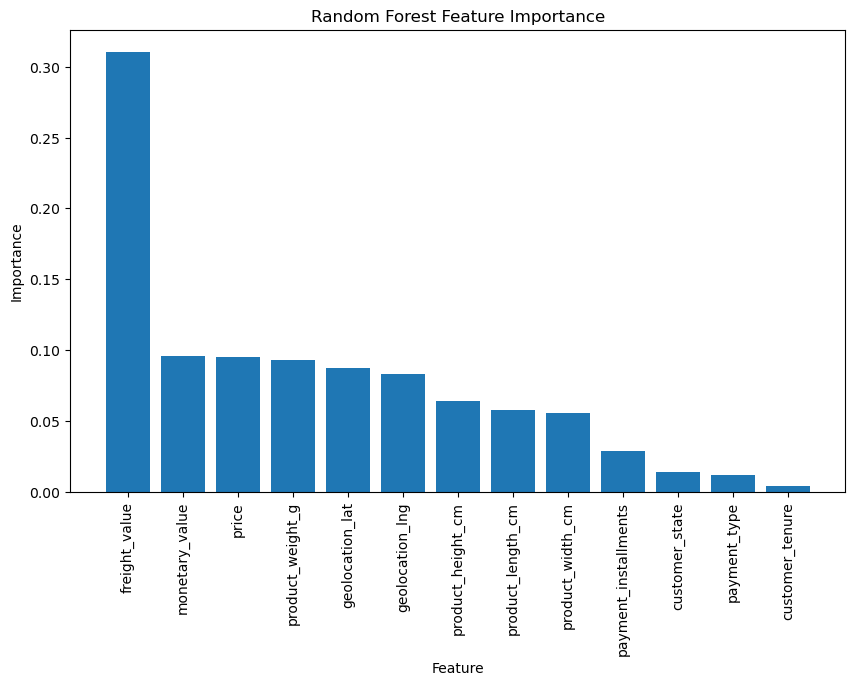

Top 10 important features: ['freight_value', 'monetary_value', 'price', 'product_weight_g', 'geolocation_lat', 'geolocation_lng', 'product_height_cm', 'product_length_cm', 'product_width_cm', 'payment_installments']


In [114]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming rand is your trained RandomForestClassifier model
rand = RandomForestClassifier()
rand_model = rand.fit(X_train, y_train)

# Plot feature importance
feature_importance_rf = rand_model.feature_importances_
features = X_train.columns

# Sort feature importance in descending order
sorted_idx = feature_importance.argsort()[::-1]

# Specify the number of top features you want to consider (e.g., top 10)
top_n = 10

# Get the top N important features
important_features_rf = [features[i] for i in sorted_idx[:top_n]]

# Plot the top features
plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), feature_importance_rf[sorted_idx], align="center")
plt.xticks(range(len(features)), [features[i] for i in sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

print("Top", top_n, "important features:", important_features_rf)



### Hypermeter tuning

#### XG boost

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X[important_features_xgboost], y, test_size=0.2, random_state=42)
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (79963, 10)
y_train (79963,)
X_test (19991, 10)
y_test (19991,)


In [108]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model
xgBoost = XGBClassifier(random_state = 10)

In [ ]:
# Define hyperparameter grid for fine-tuning
parameters = [
    {'n_estimators': [30, 40, 50, 70, 90],
     'max_depth': range(2, 7),
     'learning_rate': [0.1, 0.2, 0.4, 0.5]}

In [ ]:
# Create a GridSearchCV object for XGBoost
gcv_xgb = GridSearchCV(estimator=xgBoost, param_grid=parameters, cv=5)
gcv_xgb.fit(X_train, y_train
            
# Print the best parameters
print("Best Parameters for XGBoost:", gcv_xgb.best_params_)

In [ ]:
# Initialize XGBoost classifier with best parameters
xgBoost = XGBClassifier(learning_rate=0.5, max_depth=6, n_estimators=90)
xgBoost.fit(X_train, y_train)

In [ ]:
# Predictions on the test set
ypred_proba_xg = xgBoost.predict(X_test)
ypred_xg = [0 if i < 0.5 else 1 for i in ypred_proba_xg]
ypred_xg[:10]

In [ ]:
# Predictions on the training set
ypred_proba_xg_train = xgBoost.predict(X_train)
ypred_xg_train = [0 if i < 0.5 else 1 for i in ypred_proba_xg_train]


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, ypred_xg)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, linewidths=0.1, annot_kws={'size': 25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
# Classification Report
print(classification_report(y_test_xg, ypred_xg))

In [ ]:
# ROC Curve
plt.figure(figsize=(10, 5))
fpr, tpr, thresholds = roc_curve(y_test_xg, ypred_proba_xg)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC curve - Hyperparameter tuned XGBoost Model', fontsize=15)
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize=15)
plt.text(x=0.02, y=0.9, s=('AUC Score:', round(roc_auc_score(y_test_xg, ypred_proba_xg), 4)))
plt.grid(True)
plt.show()

### Random Forest

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X[important_features_rf], y, test_size=0.2, random_state=500)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)


X_train:  (79963, 10)
y_train:  (79963,)
X_test:  (19991, 10)
y_test:  (19991,)


In [117]:
# Initialize RandomForest classifier
rand = RandomForestClassifier(random_state=10)

# Define hyperparameter grid for fine-tuning
parameters = [
    {'criterion': ['gini', 'entropy'],
     'max_features': ['sqrt', 'log2'],
     'max_depth': range(2, 7),
     'min_samples_split': range(2, 7),
     'max_leaf_nodes': range(2, 10)}
]

In [ ]:
# Create a GridSearchCV object for RandomForest
gcv_rf = GridSearchCV(estimator=rand, param_grid=parameters, cv=5)
gcv_rf.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for Random Forest:", gcv_rf.best_params_)

In [ ]:
# Initialize RandomForest classifier with best parameters
rand = RandomForestClassifier(criterion='entropy', max_depth=6, max_features='sqrt', max_leaf_nodes=9, min_samples_split=2)
rand_model = rand.fit(X_train, y_train)


In [ ]:
# Predictions on the test set
ypred_proba_random = rand_model.predict(X_test)
ypred_random = [0 if i < 0.5 else 1 for i in ypred_proba_random]
ypred_random[:10]

In [ ]:
# Predictions on the training set
ypred_proba_random_train = rand_model.predict(X_train)
ypred_random_train = [0 if i < 0.5 else 1 for i in ypred_proba_random_train]

In [ ]:
# Confusion Matrix
cm = confusion_matrix(ytest_random, ypred_random)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, linewidths=0.1, annot_kws={'size': 25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:

# Classification Report
print(classification_report(ytest_random, ypred_random))

In [ ]:
# ROC Curve
plt.figure(figsize=(10, 5))
fpr, tpr, thresholds = roc_curve(ytest_random, ypred_proba_random)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC curve - Hyperparameter tuned Random Forest Model', fontsize=15)
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize=15)
plt.text(x=0.02, y=0.9, s=('AUC Score:', round(roc_auc_score(ytest_random, ypred_proba_random), 4)))
plt.grid(True)
plt.show()

### Model Interpretation

## Run and find the best model:

### Write interpretation